# Preparacao do Ambiente

Nesta etapa, importamos bibliotecas principais e conferimos suas versoes.
A verificacao garante que o ambiente esta configurado corretamente.
Isso reduz erros basicos durante as proximas etapas.


In [3]:
import pandas as pd
import numpy as np
import nltk
import spacy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("nltk:", nltk.__version__)
print("spacy:", spacy.__version__)

print("Ambiente OK!")


pandas: 3.0.0
numpy: 2.4.1
nltk: 3.9.2
spacy: 3.8.11
Ambiente OK!


# Carregamento do Dataset

Nesta etapa, carregamos o arquivo CSV com os textos e rotulos de sentimento.
A leitura organiza os dados em um DataFrame para consulta inicial.
Isso prepara a base para a analise exploratoria da Sprint 1.


In [4]:
import pandas as pd

df = pd.read_csv("../data/Portuguese_Twitter_sentiment.csv")
df.head()

,TweetID,HandLabel,AnnotatorID
0,387164512995930113,Neutral,8
1,387164677152964608,Positive,8
2,387164839895764992,Neutral,8
3,387165113347608576,Neutral,8
4,387165245263073280,Neutral,8


# Dimensao do Dataset

Nesta etapa, verificamos o numero de linhas e colunas do dataset.
Essa visao ajuda a compreender o tamanho da base de dados.
A informacao orienta o planejamento das analises seguintes.


In [5]:
df.shape

(157393, 3)

# Lista de Colunas

Nesta etapa, listamos os nomes das colunas disponiveis no dataset.
Isso esclarece quais atributos estao presentes para a analise.
A verificacao garante consistencia nas proximas etapas.


In [6]:
df.columns

Index(['TweetID', 'HandLabel', 'AnnotatorID'], dtype='str')

# Distribuicao das Classes

Nesta etapa, verificamos a frequencia das classes de sentimento.
A contagem mostra como os rotulos estao distribuidos na base.
Essa visao inicial ajuda a identificar possiveis desequilibrios.


In [7]:
df['HandLabel'].value_counts()

HandLabel
Negative    58592
Neutral     53820
Positive    44981
Name: count, dtype: int64

# Importacao de Bibliotecas

Nesta etapa, reunimos as bibliotecas necessarias para a analise.
A organizacao das dependencias facilita a reproducao do notebook.
Esse passo sustenta o restante do fluxo de trabalho.


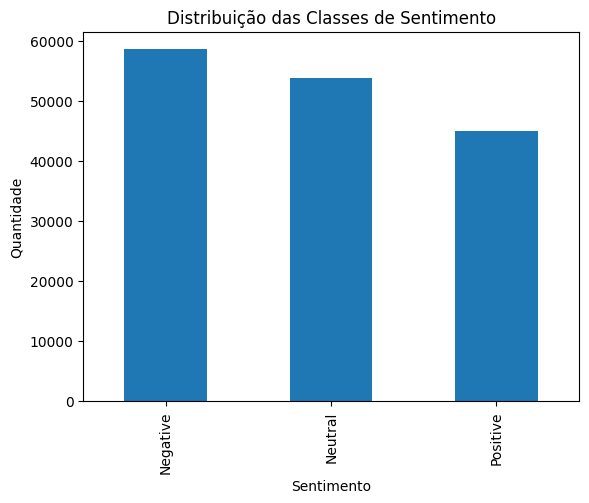

In [8]:
import matplotlib.pyplot as plt

df['HandLabel'].value_counts().plot(kind='bar')
plt.title("Distribuição das Classes de Sentimento")
plt.xlabel("Sentimento")
plt.ylabel("Quantidade")
plt.show()

# Importacao de Bibliotecas

Nesta etapa, reunimos as bibliotecas necessarias para a analise.
A organizacao das dependencias facilita a reproducao do notebook.
Esse passo sustenta o restante do fluxo de trabalho.


In [9]:
import pandas as pd

df_texto = pd.DataFrame({
    "text": [
        "Amei o atendimento!!! 😍🔥",
        "Péssimo... não recomendo. Demorou demais 😡",
        "Produto ok, nada demais.",
        "Gostei muito! Entrega rápida e bem embalado :)",
        "Horrível!!! Veio quebrado e ninguém resolveu.",
        "Top demais kkk gostei 👏👏",
        "Não sei... talvez eu compre de novo.",
        "Excelente custo-benefício!!!",
        "Muito ruim, dinheiro jogado fora.",
        "Achei bom, mas poderia ser melhor."
    ]
})

df_texto.head()

,text
0,Amei o atendimento!!! 😍🔥
1,Péssimo... não recomendo. Demorou demais 😡
2,"Produto ok, nada demais."
3,Gostei muito! Entrega rápida e bem embalado :)
4,Horrível!!! Veio quebrado e ninguém resolveu.


# Importacao de Bibliotecas

Nesta etapa, reunimos as bibliotecas necessarias para a analise.
A organizacao das dependencias facilita a reproducao do notebook.
Esse passo sustenta o restante do fluxo de trabalho.


In [10]:
import re
import unicodedata

# Se não tiver stopwords baixadas ainda:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

STOPWORDS_PT = set(stopwords.words("portuguese"))

def preprocess_text(text: str) -> str:
    text = str(text)

    # remove URLs
    text = re.sub(r"http\S+|www\.\S+", "", text)

    # remove menções e hashtags (mantém a palavra sem o #, se quiser)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#", "", text)

    # lowercase
    text = text.lower()

    # remove acentos
    text = unicodedata.normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

    # remove caracteres que não são letras/números/espaços
    text = re.sub(r"[^a-z0-9\s]", " ", text)

    # remove espaços extras
    text = re.sub(r"\s+", " ", text).strip()

    # remove stopwords
    tokens = [w for w in text.split() if w not in STOPWORDS_PT]
    return " ".join(tokens)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maiky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Aplicacao do Pre-processamento

Nesta etapa, aplicamos a funcao de limpeza aos textos originais.
O resultado e uma nova coluna com os textos tratados.
Isso prepara os dados para a vetorizacao.


In [11]:
df_texto["text_clean"] = df_texto["text"].apply(preprocess_text)
df_texto[["text", "text_clean"]].head(10)

,text,text_clean
0,Amei o atendimento!!! 😍🔥,amei atendimento
1,Péssimo... não recomendo. Demorou demais 😡,pessimo nao recomendo demorou demais
2,"Produto ok, nada demais.",produto ok nada demais
3,Gostei muito! Entrega rápida e bem embalado :),gostei entrega rapida bem embalado
4,Horrível!!! Veio quebrado e ninguém resolveu.,horrivel veio quebrado ninguem resolveu
5,Top demais kkk gostei 👏👏,top demais kkk gostei
6,Não sei... talvez eu compre de novo.,nao sei talvez compre novo
7,Excelente custo-benefício!!!,excelente custo beneficio
8,"Muito ruim, dinheiro jogado fora.",ruim dinheiro jogado
9,"Achei bom, mas poderia ser melhor.",achei bom poderia melhor


# Etapa do Notebook

Nesta etapa, executamos uma parte do fluxo basico da Sprint 1.
O objetivo e organizar os dados ou validar uma operacao simples.
Isso contribui para manter o notebook claro e reprodutivel.


In [12]:
teste = "Muito bom!!! Visite https://site.com @fulano #promoção 😍😍"
print("Original:", teste)
print("Tratado :", preprocess_text(teste))


Original: Muito bom!!! Visite https://site.com @fulano #promoção 😍😍
Tratado : bom visite promocao


# Inspecao Inicial

Nesta etapa, visualizamos uma amostra do dataset para compreensao rapida.
A exibicao ajuda a validar colunas e formatos antes de seguir.
Essa checagem e parte da exploracao inicial.


In [13]:
df_texto[["text", "text_clean"]].head()

,text,text_clean
0,Amei o atendimento!!! 😍🔥,amei atendimento
1,Péssimo... não recomendo. Demorou demais 😡,pessimo nao recomendo demorou demais
2,"Produto ok, nada demais.",produto ok nada demais
3,Gostei muito! Entrega rápida e bem embalado :),gostei entrega rapida bem embalado
4,Horrível!!! Veio quebrado e ninguém resolveu.,horrivel veio quebrado ninguem resolveu


# Configuracao do Vetorizador

Nesta etapa, configuramos o vetorizador TF-IDF para os textos.
Definimos parametros basicos como tamanho do vocabulario e n-gramas.
Isso estabelece a forma de representacao numerica dos textos.


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=1000,
    ngram_range=(1, 2)
)


# Dimensao do Dataset

Nesta etapa, verificamos o numero de linhas e colunas do dataset.
Essa visao ajuda a compreender o tamanho da base de dados.
A informacao orienta o planejamento das analises seguintes.


In [15]:
X = vectorizer.fit_transform(df_texto["text_clean"])
X.shape


(10, 66)

# Vocabulario Gerado

Nesta etapa, inspecionamos os termos aprendidos pelo vetorizador.
Isso ajuda a entender quais palavras compoem a representacao.
A visualizacao e util para validacao basica do processo.


In [16]:
vectorizer.get_feature_names_out()[:20]

array(['achei', 'achei bom', 'amei', 'amei atendimento', 'atendimento',
       'bem', 'bem embalado', 'beneficio', 'bom', 'bom poderia', 'compre',
       'compre novo', 'custo', 'custo beneficio', 'demais', 'demais kkk',
       'demorou', 'demorou demais', 'dinheiro', 'dinheiro jogado'],
      dtype=object)

# Importacao de Bibliotecas

Nesta etapa, reunimos as bibliotecas necessarias para a analise.
A organizacao das dependencias facilita a reproducao do notebook.
Esse passo sustenta o restante do fluxo de trabalho.


In [17]:
import pandas as pd

X_df = pd.DataFrame(
    X.toarray(),
    columns=vectorizer.get_feature_names_out()
)

X_df.head()


,achei,achei bom,amei,amei atendimento,atendimento,bem,bem embalado,beneficio,bom,bom poderia,...,ruim,ruim dinheiro,sei,sei talvez,talvez,talvez compre,top,top demais,veio,veio quebrado
0,0.0,0.0,0.57735,0.57735,0.57735,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.00000,0.00000,0.00000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.0,0.00000,0.00000,0.00000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.0,0.0,0.00000,0.00000,0.00000,0.338591,0.338591,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.0,0.00000,0.00000,0.00000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333


# Definicao de Rotulos

Nesta etapa, definimos os rotulos de exemplo para o pipeline.
Os valores representam classes de sentimento em formato numerico.
Essa etapa serve para ilustrar o fluxo de treino e teste.


In [18]:
# rótulos de exemplo (apenas para pipeline)
y = [1, 0, 1, 1, 0, 1, 0, 1, 0, 1]


# Divisao Treino e Teste

Nesta etapa, separamos os dados em conjuntos de treino e teste.
A divisao permite avaliar o desempenho de forma organizada.
Usamos parametros simples e reproduziveis.


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# Dimensao do Dataset

Nesta etapa, verificamos o numero de linhas e colunas do dataset.
Essa visao ajuda a compreender o tamanho da base de dados.
A informacao orienta o planejamento das analises seguintes.


In [20]:
X_train.shape, X_test.shape


((8, 66), (2, 66))

# Balanceamento dos Rotulos

Nesta etapa, verificamos a distribuicao dos rotulos nos conjuntos.
A contagem confirma se o split manteve o equilibrio esperado.
Essa checagem e importante para validacao basica.


In [21]:
from collections import Counter

Counter(y_train), Counter(y_test)


(Counter({1: 5, 0: 3}), Counter({0: 1, 1: 1}))

In [22]:
from sklearn.linear_model import LogisticRegression

model_baseline = LogisticRegression(max_iter=1000)
model_baseline.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [23]:
y_pred = model_baseline.predict(X_test)


In [24]:
from sklearn.metrics import accuracy_score, classification_report

acc = accuracy_score(y_test, y_pred)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



c:\Users\Maiky\Downloads\analise-sentimentos-ptbr\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Maiky\Downloads\analise-sentimentos-ptbr\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Maiky\Downloads\analise-sentimentos-ptbr\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

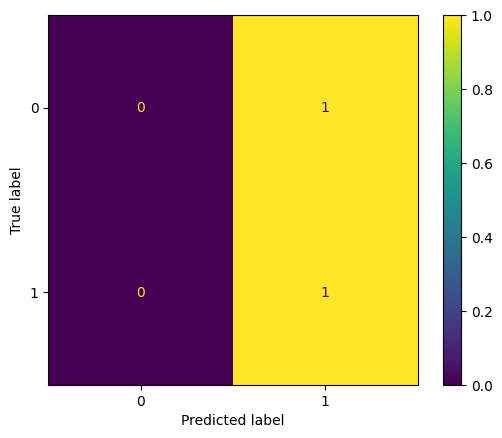

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


In [27]:
from sklearn.svm import LinearSVC

In [28]:
model_principal = LinearSVC()
model_principal.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2'}, default='l2'Specifies the norm used in the penalization. The 'l2'penalty is the standard used in SVC. The 'l1' leads to ``coef_``vectors that are sparse.",'l2'
,"loss loss: {'hinge', 'squared_hinge'}, default='squared_hinge'Specifies the loss function. 'hinge' is the standard SVM loss(used e.g. by the SVC class) while 'squared_hinge' is thesquare of the hinge loss. The combination of ``penalty='l1'``and ``loss='hinge'`` is not supported.",'squared_hinge'
,"dual dual: ""auto"" or bool, default=""auto""Select the algorithm to either solve the dual or primaloptimization problem. Prefer dual=False when n_samples > n_features.`dual=""auto""` will choose the value of the parameter automatically,based on the values of `n_samples`, `n_features`, `loss`, `multi_class`and `penalty`. If `n_samples` < `n_features` and optimizer supportschosen `loss`, `multi_class` and `penalty`, then dual will be set to True,otherwise it will be set to False... versionchanged:: 1.3 The `""auto""` option is added in version 1.3 and will be the default in version 1.5.",'auto'
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.For an intuitive visualization of the effects of scalingthe regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"multi_class multi_class: {'ovr', 'crammer_singer'}, default='ovr'Determines the multi-class strategy if `y` contains more thantwo classes.``""ovr""`` trains n_classes one-vs-rest classifiers, while``""crammer_singer""`` optimizes a joint objective over all classes.While `crammer_singer` is interesting from a theoretical perspectiveas it is consistent, it is seldom used in practice as it rarely leadsto better accuracy and is more expensive to compute.If ``""crammer_singer""`` is chosen, the options loss, penalty and dualwill be ignored.",'ovr'
,"fit_intercept fit_intercept: bool, default=TrueWhether or not to fit an intercept. If set to True, the feature vectoris extended to include an intercept term: `[x_1, ..., x_n, 1]`, where1 corresponds to the intercept. If set to False, no intercept will beused in calculations (i.e. data is expected to be already centered).",True
,"intercept_scaling intercept_scaling: float, default=1.0When `fit_intercept` is True, the instance vector x becomes ``[x_1,..., x_n, intercept_scaling]``, i.e. a ""synthetic"" feature with aconstant value equal to `intercept_scaling` is appended to the instancevector. The intercept becomes intercept_scaling * synthetic featureweight. Note that liblinear internally penalizes the intercept,treating it like any other term in the feature vector. To reduce theimpact of the regularization on the intercept, the `intercept_scaling`parameter can be set to a value greater than 1; the higher the value of`intercept_scaling`, the lower the impact of regularization on it.Then, the weights become `[w_x_1, ..., w_x_n,w_intercept*intercept_scaling]`, where `w_x_1, ..., w_x_n` representthe feature weights and the intercept weight is scaled by`intercept_scaling`. This scaling allows the intercept term to have adifferent regularization behavior compared to the other features.",1
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to ``class_weight[i]*C`` forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: int, default=0Enable verbose output. Note that this setting takes advantage of aper-process runtime setting in liblinear that, if enabled, may not workproperly in a multithreaded context.",0
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo rand

In [29]:
y_pred_svm = model_principal.predict(X_test)


In [30]:
from sklearn.metrics import accuracy_score, classification_report

acc_svm = accuracy_score(y_test, y_pred_svm)
acc_svm


0.5

In [ ]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



c:\Users\Maiky\Downloads\analise-sentimentos-ptbr\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Maiky\Downloads\analise-sentimentos-ptbr\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Maiky\Downloads\analise-sentimentos-ptbr\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

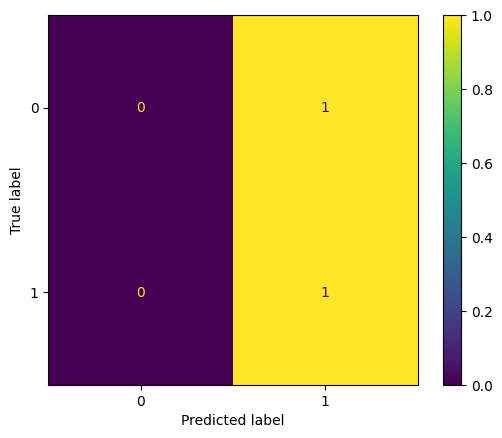

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)